In [1]:
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import time
import statistics
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage import exposure
import earthpy.spatial as es
import rasterio
from rasterio.plot import show
from tqdm.notebook import tqdm 
import math
from sklearn.metrics import silhouette_score 
from sklearn.datasets import make_blobs 
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


In [7]:
landsat='C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban'

In [8]:
landsat_paths = glob(os.path.join(landsat,"*_B*.TIF"))
print(landsat_paths)

['C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban\\LT05_L2SP_138045_20111108_20200820_02_T1_SR_B1.TIF', 'C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban\\LT05_L2SP_138045_20111108_20200820_02_T1_SR_B2.TIF', 'C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban\\LT05_L2SP_138045_20111108_20200820_02_T1_SR_B3.TIF', 'C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban\\LT05_L2SP_138045_20111108_20200820_02_T1_SR_B4.TIF', 'C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban\\LT05_L2SP_138045_20111108_20200820_02_T1_SR_B5.TIF', 'C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban\\LT05_L2SP_138045_20111108_20200820_02_T1_SR_B7.TIF', 'C:/Users/SHASANK DIXIT/Desktop/DST PROJECT/sundarban\\LT05_L2SP_138045_20111108_20200820_02_T1_ST_B6.TIF']


In [189]:
array_stack, meta_data = es.stack([landsat_paths[0],landsat_paths[1],landsat_paths[2],landsat_paths[3]], nodata=-9999)
array_stack

masked_array(
  data=[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],

        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],
  mask=False,
  fill_value=55537,
  dtype=uint16)

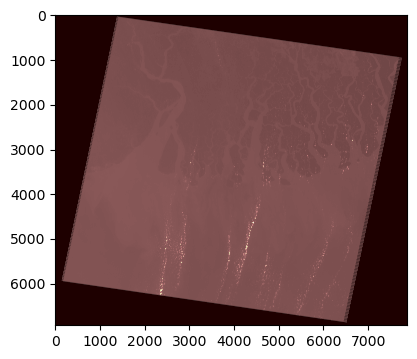

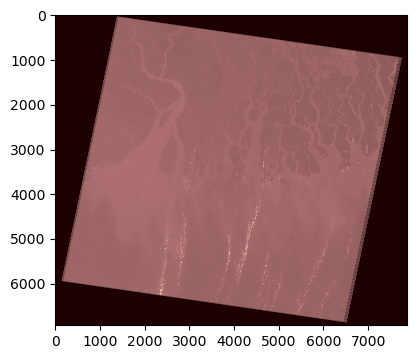

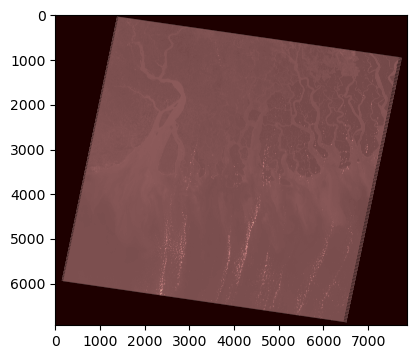

In [24]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(array_stack[0,:,:],cmap='pink')
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(array_stack[1,:,:],cmap='pink')
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(array_stack[2,:,:],cmap='pink')

In [13]:
meta_data

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7881, 'height': 6931, 'count': 3, 'crs': CRS.from_epsg(32645), 'transform': Affine(30.0, 0.0, 538785.0,
       0.0, -30.0, 2499315.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [190]:
img=array_stack[:,1500:2000,6200:6700]

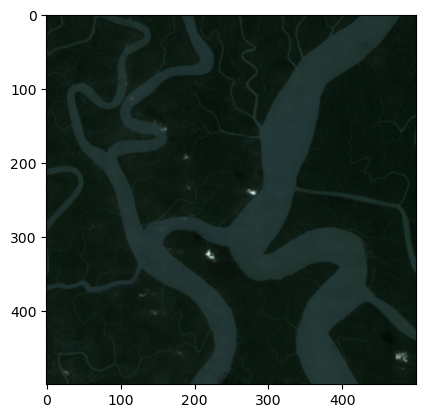

In [188]:
from earthpy.spatial import bytescale
img=bytescale(rasterio.plot.reshape_as_image(img))
plt.imshow(img)

In [191]:
img1=es.normalized_diff(b1=img[1],b2=img[3])

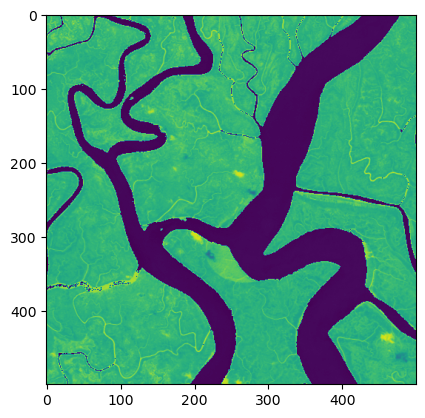

In [192]:
plt.imshow(img1)


In [74]:
img1

masked_array(
  data=[[0.050165595168517436, 0.058985315063110846,
         0.058985315063110846, ..., 2.222656694886299, 2.452999068486493,
         2.394433781190019],
        [0.050165595168517436, 0.05040392526143629, 0.058985315063110846,
         ..., 2.315653197332287, 2.5614852108244177, 2.394433781190019],
        [0.05040392526143629, 0.05040392526143629, 0.05040392526143629,
         ..., 2.536557930258718, 2.523849232821881, 2.3719165839126117],
        ...,
        [2.525917345799032, 2.4650279694581685, 2.4650279694581685, ...,
         2.3401597216731242, 2.3723289099146054, 2.2969365853658537],
        [2.4414209821971693, 2.3829276105060857, 2.4650279694581685, ...,
         2.4202910234189208, 2.5398606649701723, 2.590032154340836],
        [2.4902552393378454, 2.3932475495139367, 2.4414209821971693, ...,
         2.641802575107296, 2.385182513923949, 2.2019033117624667]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., Fals

In [131]:
import statistics

In [193]:
a=np.array(img1)

In [194]:
a=a.reshape(-1)

In [195]:
a.shape[0]

250000

In [196]:
for i in range(0,a.shape[0]):
    if(a[i]>2.0):
        a[i]=0
    else:
        a[i]=1

In [197]:
img2=a.reshape(500,500)

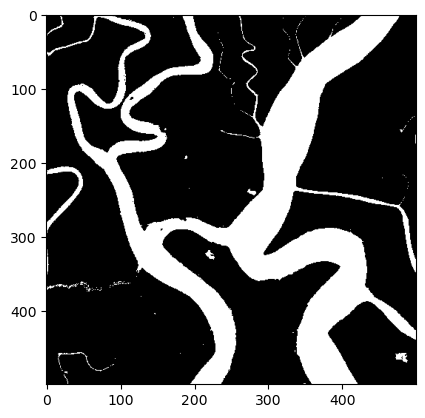

In [198]:
plt.imshow(img2,cmap='gray')
